<a href="https://colab.research.google.com/github/ElectroLic/AI-Lab-NTU-Singapore-/blob/main/CNN_4_layers_3136_dimension_500k_parameter_ipynb%EF%BC%88lzl%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
train_dir = "/content/drive/MyDrive/AI Lab  NTU Singapore/Pneumonia/train"

In [ ]:
test_dir = "/content/drive/MyDrive/AI Lab  NTU Singapore/Pneumonia/test"

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data = ImageDataGenerator(rescale=1./255).flow_from_directory(train_dir, target_size=(150, 150), batch_size=5, shuffle=False)

Found 5216 images belonging to 2 classes.


In [ ]:
test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir, target_size=(150, 150), batch_size=5, shuffle=False)

Found 624 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.2))

In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.2))

In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.2))

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,568 (256.12 KB)

 Trainable params: 65,568 (256.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
h = model.fit(train_data, epochs=5, batch_size=5)

Epoch 1/5
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 260s 245ms/step - accuracy: 0.7483 - loss: 0.5887
Epoch 2/5
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 254s 242ms/step - accuracy: 0.7204 - loss: 0.5947
Epoch 3/5
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 261s 242ms/step - accuracy: 0.7342 - loss: 0.5843
Epoch 4/5
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 254s 242ms/step - accuracy: 0.7580 - loss: 0.5564
Epoch 5/5
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 255s 244ms/step - accuracy: 0.7549 - loss: 0.5632


In [ ]:
model.evaluate(test_data)

125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 114ms/step - accuracy: 0.2632 - loss: 0.9687


[0.6723670363426208, 0.625]

In [ ]:
import matplotlib.pyplot as plt

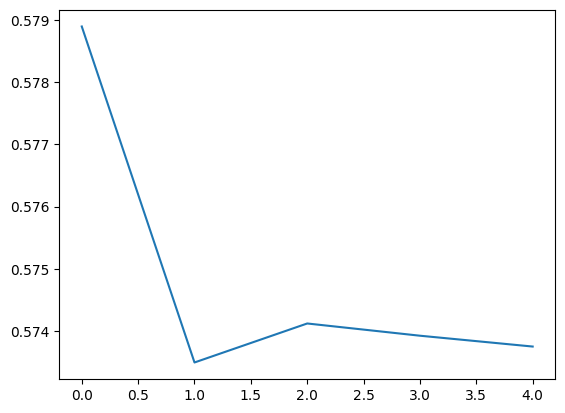

In [ ]:
plt.plot(h.history['loss'])